# Dimensionality Reduction Techniques: PCA, t-SNE, UMAP

In this notebook, we will explore three popular dimensionality reduction techniques: PCA, t-SNE, and UMAP. We will use the famous MNIST dataset for this purpose. The MNIST dataset is a collection of 28x28 grayscale images of handwritten digits (0-9). Each image has 784 features (28x28 pixels) and is therefore represented in a 784-dimensional space. We will reduce this 784-dimensional space to 2 dimensions using PCA, t-SNE, and UMAP and visualize the results.

Let's start by downloading the dataset. HuggingFace provides a convenient function `load_datasets` to download the MNIST dataset.

In [1]:
!pip install datasets umap-learn

In [2]:
from datasets import load_dataset

digits = load_dataset('ylecun/mnist')
X = digits['train']['image']
y = digits['train']['label']

len(X), len(y)

(60000, 60000)

We can see that the dataset contains 60000 images, and 60000 labels. Each image is 28x28 pixels, or 784 features:

In [3]:
import numpy as np

np.array(X[0]).shape

(28, 28)



Let's plot a few images to see what they look like.

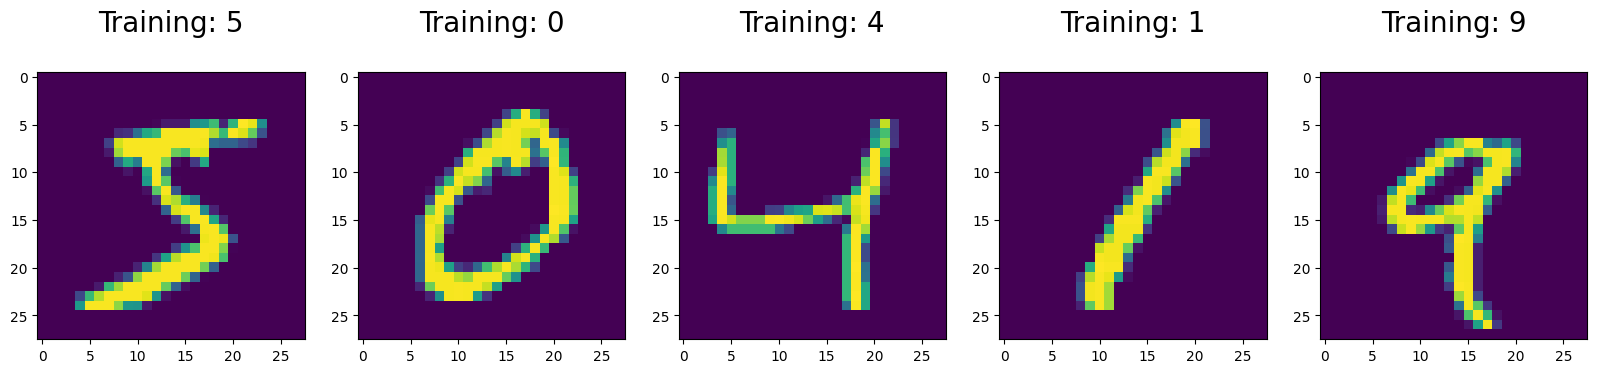

In [4]:
import matplotlib.pyplot as plt

# plot some sample digits
number_of_images = 5

plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(X[:number_of_images], y[:number_of_images])):
    plt.subplot(1, number_of_images, index + 1)
    plt.imshow(image)
    plt.title('Training: %i\n' % label, fontsize = 20)

To use the dataset with the dimensionality reduction techniques, we need to flatten the images into a 1D array. We will do this using the `reshape` function from NumPy.

In [5]:
X = np.array(X).reshape(-1, 784)
X.shape

(60000, 784)

## Principle Component Analysis (PCA)

Principle Component Analysis (PCA) is a linear dimensionality reduction technique that is widely used in practice. PCA finds the directions (or principal components) along which the variance of the data is maximized. These directions are orthogonal to each other and form a new coordinate system. The data is then projected onto these new axes, resulting in a lower-dimensional representation of the data. Each subsequent principal component captures less variance than the previous one. The first dimension explains the largest part of the variance, the second dimension explains the second largest part of the variance, and so on.  PCA is a powerful technique for reducing the dimensionality of data while preserving as much variance as possible.

Let's start by applying PCA to the MNIST dataset and then visualize the explained variance per principal component. By doing this, we can determine how many principal components are needed to capture most of the variance in the data.

<Axes: >

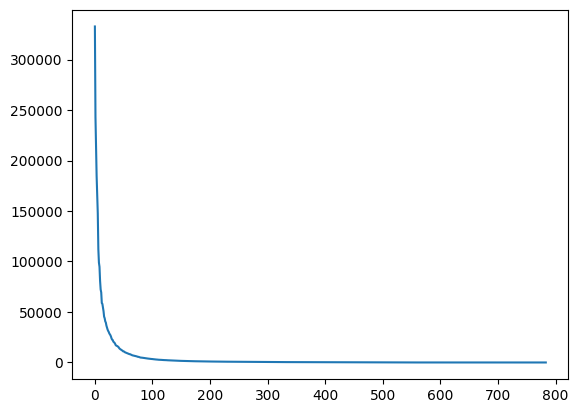

In [6]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA()
pca.fit(X)

sns.lineplot(pca.explained_variance_)

Much like the `Elbow method` we saw earlier when discussing the `KMeans` clustering algorithm, we can use the `explained_variance_ratio_` attribute of the PCA object to determine the number of principal components needed to capture most of the variance in the data. We look at the inflection point in the plot of explained variance ratio to determine the number of principal components to keep. In the plot above, the inflection point is between five and ten principal components. This means that we can reduce the dimensionality of the data from 784 to between five and ten while still capturing most of the variance in the data.

However, to visualize data, we need to reduce the dimensionality to two or three dimensions. Here we will limit the dimensionality to two dimensions as 2D plots are often easier to interpret than 3D plots. We can do this by setting the number of components to 2 in the PCA object. We then fit the PCA object to the data and transform the data to the new 2D space. We can then plot the transformed data to visualize the results.

<Axes: >

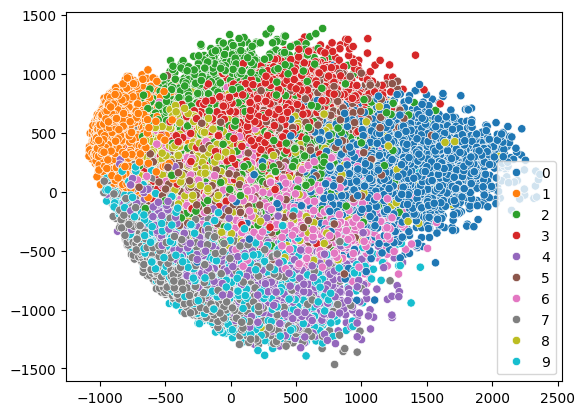

In [7]:
pca = PCA(2)
projected_2d = pca.fit_transform(X)

sns.scatterplot(x=projected_2d[:, 0], y=projected_2d[:, 1], hue=y, palette='tab10')

Using PCA, we already see that the images for different numbers are somewhat separated in the 2D space. This is a good sign that PCA has captured some of the underlying structure in the data. However, we do not see clear clusters for each number, which suggests that the data is not (completely) linearly separable in the 2D space. Let's see what happens when we use t-SNE to reduce the dimensionality of the data.

## t-SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensionality reduction technique that is particularly well-suited for visualizing high-dimensional data in a low-dimensional space. t-SNE works by modeling the high-dimensional data as a distribution of pairwise similarities and then finding a low-dimensional representation that preserves these similarities as much as possible. t-SNE is known for its ability to reveal the underlying structure of the data and is widely used for visualization purposes. t-SNE excels at preserving local structure in the data.

<Axes: >

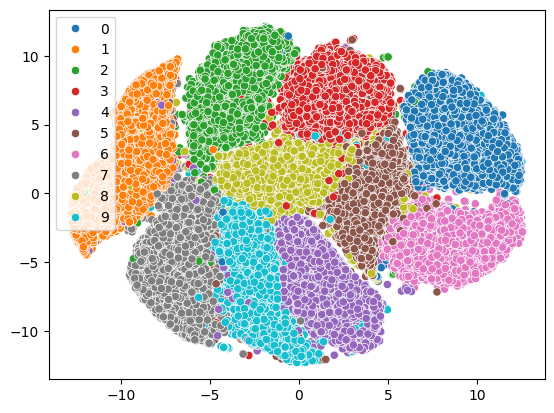

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(max_iter=300)
tsne_2d = tsne.fit_transform(X)

sns.scatterplot(x=tsne_2d[:, 0], y=tsne_2d[:, 1], hue=y, palette='tab10')

Using t-SNE we see that the images for different numbers are more clearly separated in the 2D space. We see distinct clusters for each number, but separate clusters are still close to each other. It looks like t-SNE indeed captured the local structure of the data quite well, i.e. similar numbers are located close to each other, but does not entirely capture the more global structure of the data; totally different numbers are still plotted close to each other. Let's see what happens when we use UMAP to reduce the dimensionality of the data.

## Uniform Manifold Approximation and Projection (UMAP)

UMAP is a non-linear dimensionality reduction technique that is similar to t-SNE but has some advantages over it. UMAP is faster, more scalable, and can handle larger datasets than t-SNE. UMAP works by constructing a high-dimensional graph representation of the data and then optimizing a low-dimensional embedding that preserves the local and global structure of the data. UMAP is known for its ability to capture both local and global structure in the data and is widely used for visualization and clustering tasks. 

<Axes: >

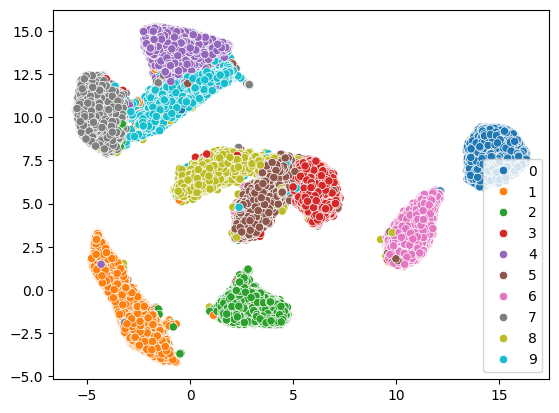

In [9]:
import umap 

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1,  n_components=2)
umap_results = umap_model.fit_transform(X)

sns.scatterplot(x=umap_results[:, 0], y=umap_results[:, 1], hue=y, palette='tab10')

Using UMAP, we see that it captures local as well as global structure in the data. The images for distinct numbers are clearly separated in the 2D space, and we see distinct clusters for each number. Moreover, more similar numbers also are cluster more closely together. For instance, the cluster in the top left captures the 7, 4, and 9, which can have some similarity in written text. The cluster in the middle contains the numbers 3, 5, and 8 for which the same holds true. The other clusters contain numbers that are not so similar to each other and are thus more dispersed in the 2D space. We can clearly see the clusters are more separated from each other compared to t-SNE, and the global structure of the data is better preserved. Also, the images per single digit seem to have been grouped together quite successfully. UMAP seems to have done a good job at capturing the underlying structure of the data.

Note however, that even thought the separate clusters are separate, almost each cluster contains digits from another class. This is because the MNIST dataset contains handwritten digits and in some handwritings the digits can look very similar. This is a well-know challenge in the MNIST dataset and is also the reason why it is often used as a benchmark dataset for machine learning algorithms.

# Conclusion

In this notebook, we explored three popular dimensionality reduction techniques: PCA, t-SNE, and UMAP. We applied these techniques to the MNIST dataset and visualized the results in a 2D space. We saw that PCA captures the global structure of the data but does not separate the clusters very well. t-SNE captures the local structure of the data but does not separate the clusters very well either. UMAP captures both the local and global structure of the data and separates the clusters quite well. 

Of course, the results of dimension reduction will not always be as clear-cut as for the MNIST dataset. Moreover, the choice of dimensionality reduction technique depends on the specific task at hand. PCA is a good choice when you want to reduce the dimensionality of the data while preserving as much variance as possible. t-SNE is a good choice when you want to visualize high-dimensional data in a low-dimensional space and capture the local structure of the data. UMAP is a good choice when you want to capture both the local and global structure of the data and separate the clusters well. Each technique has its own strengths and weaknesses, and it is important to choose the right technique for the task at hand.

| Characteristic | PCA    | t-SNE      | UMAP       |
|----------------| ------ | ---------- | ---------- |
| Type           | Linear | Non-linear | Non-linear |
| Goal           | Preserve variance | Preserve local structure | Preserve local and global structure |
| Speed          | Fastest  | Slow       | Fast       |
| Scalability    | Good     | Poor       | Good       |
| Best Used For  | Data with linear structure | Data with local structure | Data with local and global structure |
| Output         | Principal components | Low-dimensional representation | Low-dimensional representation |
| Use case       | Noise reduction, feature extraction | Visualization, clustering | Visualization, clustering |




# Related Articles 

- [PCA vs t-SNE](https://www.datacamp.com/tutorial/introduction-t-sne)

- [PCA, t-SNE, and UMAP](https://naveen-malla.medium.com/mastering-dimensionality-reduction-a-comprehensive-guide-to-pca-t-sne-and-umap-211ace83c28e)